In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

### Load Dataset

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
print("Loading datasets from Google Drive...")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading datasets from Google Drive...


### Dataset Overview

In [ ]:
wb_gtd = pd.read_csv("/content/drive/MyDrive/LABS/DV/PROJECT/dataset/wb_gtd_cleaned_joined.csv")

In [ ]:
wb_gtd.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'date', 'country_txt',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'target_sector',
       'gname', 'nkill_clean', 'nwound_clean', 'total_casualties',
       'casualties_category', 'fatalities_category', 'injuries_category',
       'is_successful', 'year', 'month', 'quarter', 'season', 'population',
       'gdp_per_capita', 'attacks_per_million', 'casualties_per_million',
       'fatalities_per_million'],
      dtype='object')

In [ ]:
wb_gtd.isnull().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
date,0
country_txt,0
region_txt,0
provstate,0
city,0
latitude,0


In [ ]:
wb_gtd.shape

(138900, 32)

In [ ]:
# ================================================================
# 1. BASIC DATA OVERVIEW
# ================================================================

print("\nDATASET OVERVIEW")
print("-" * 70)
print(f"Total incidents: {len(wb_gtd):,}")
print(f"Time period: {wb_gtd['iyear'].min()} - {wb_gtd['iyear'].max()}")
print(f"Countries: {wb_gtd['country_txt'].nunique()}")
print(f"Regions: {wb_gtd['region_txt'].nunique()}")
print(f"Total columns: {len(wb_gtd.columns)}")


DATASET OVERVIEW
----------------------------------------------------------------------
Total incidents: 138,900
Time period: 2000 - 2020
Countries: 171
Regions: 12
Total columns: 32


### EDA

------------------------------------------------------------
TEMPORAL ANALYSIS
------------------------------------------------------------

============Yearly Analysis============

Attacks by Year: 
 iyear
2000     1781
2001     1889
2002     1308
2003     1265
2004     1135
2005     1985
2006     2715
2007     3207
2008     4752
2009     4708
2010     4820
2011     5050
2012     8473
2013    11935
2014    16849
2015    15031
2016    14006
2017    11312
2018     9793
2019     8508
2020     8378
dtype: int64

Peak year: 2014 (16,849 attacks)
Lowest year: 2004 (1,135 attacks)
Average per year: 6614 attacks


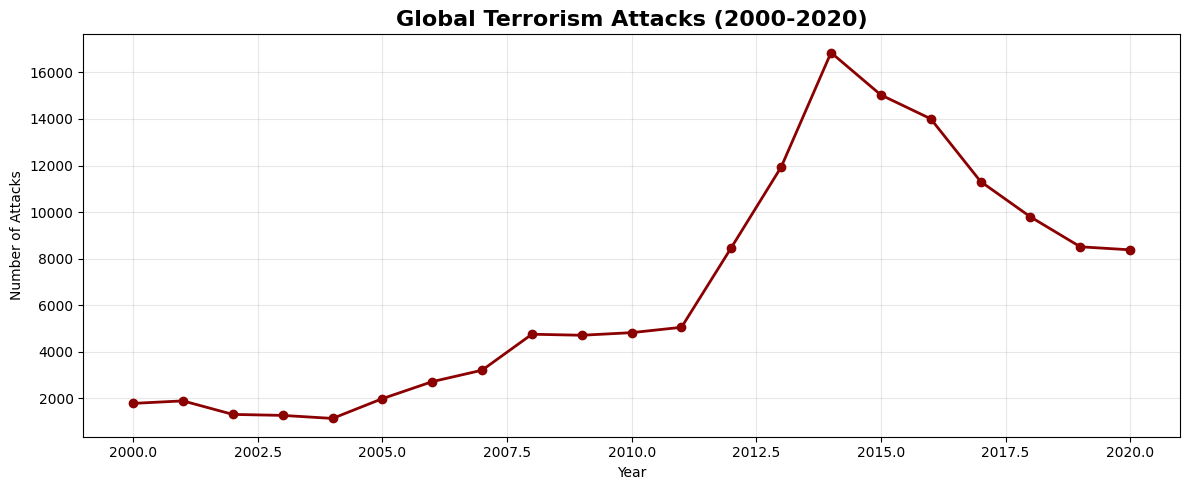


============Monthly Analysis============

Attacks by Month: 
 imonth
1     11625
2     10654
3     11250
4     11813
5     13170
6     11945
7     12583
8     12066
9     10633
10    11468
11    11416
12    10277
dtype: int64

Most active months: [5, 7, 8]
Least active months: [12, 9, 2]


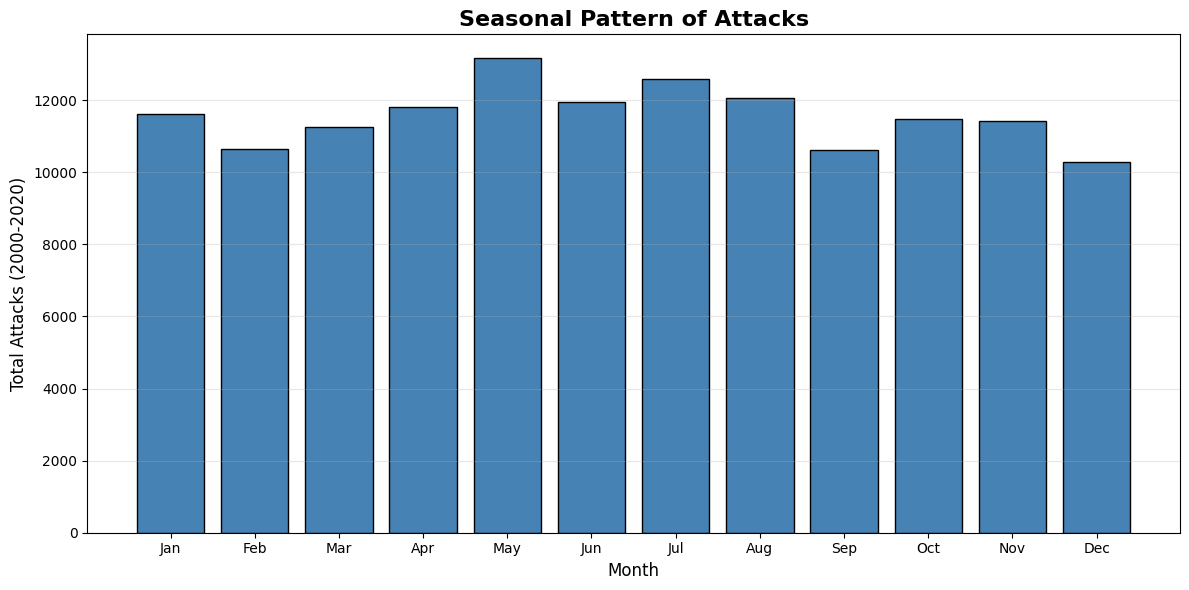

In [ ]:
  # ================================================================
  # EDA 1: TEMPORAL TRENDS
  # ================================================================
  print("-"*60)
  print("TEMPORAL ANALYSIS")
  print("-"*60)

  # --- YEARLY---
  # Attacks by year
  attacks_by_year = wb_gtd.groupby('iyear').size()

  print("\n============Yearly Analysis============")
  print("\nAttacks by Year:","\n" ,attacks_by_year)
  print(f"\nPeak year: {attacks_by_year.idxmax()} ({attacks_by_year.max():,} attacks)")
  print(f"Lowest year: {attacks_by_year.idxmin()} ({attacks_by_year.min():,} attacks)")
  print(f"Average per year: {attacks_by_year.mean():.0f} attacks")

  # Visualization
  plt.figure(figsize=(12, 5))
  attacks_by_year.plot(kind='line', marker='o', color='darkred', linewidth=2)
  plt.title('Global Terrorism Attacks (2000-2020)', fontsize=16, fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Attacks')
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.savefig('fig1_yearly_trend.png', dpi=300, bbox_inches='tight')
  plt.show()

  #---MONTHLY---
  # Monthly seasonality
  monthly = wb_gtd.groupby('imonth').size()
  months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  print("\n============Monthly Analysis============")
  print("\nAttacks by Month:","\n" ,monthly)
  print(f"\nMost active months: {monthly.nlargest(3).index.tolist()}")
  print(f"Least active months: {monthly.nsmallest(3).index.tolist()}")

  plt.figure(figsize=(12, 6))
  plt.bar(range(1, 13), monthly, color='steelblue', edgecolor='black')
  plt.xticks(range(1, 13), months)
  plt.title('Seasonal Pattern of Attacks', fontsize=16, fontweight='bold')
  plt.xlabel('Month', fontsize=12)
  plt.ylabel('Total Attacks (2000-2020)', fontsize=12)
  plt.grid(axis='y', alpha=0.3)
  plt.tight_layout()
  plt.savefig('fig2_seasonal.png', dpi=300, bbox_inches='tight')
  plt.show()


------------------------------------------------------------
GEOGRAPHIC DISTRIBUTION
----------------------------------------------------------------------

Attacks by Region:
  Middle East & North Africa: 48,411 (34.9%)
  South Asia: 46,797 (33.7%)
  Sub-Saharan Africa: 19,010 (13.7%)
  Southeast Asia: 11,527 (8.3%)
  Eastern Europe: 4,182 (3.0%)
  Western Europe: 3,887 (2.8%)
  South America: 3,318 (2.4%)
  North America: 1,034 (0.7%)
  Central Asia: 243 (0.2%)
  East Asia: 243 (0.2%)
  Central America & Caribbean: 130 (0.1%)
  Australasia & Oceania: 118 (0.1%)

Top 15 Countries:
  1. Iraq: 27,220
  2. Afghanistan: 18,697
  3. Pakistan: 13,653
  4. India: 10,878
  5. Philippines: 6,269
  6. Yemen: 5,817
  7. Nigeria: 5,429
  8. Somalia: 5,132
  9. Thailand: 3,958
  10. Syria: 2,813
  11. Colombia: 2,667
  12. Libya: 2,463
  13. Egypt, Arab Rep.: 2,167
  14. Turkey: 1,977
  15. Russian Federation: 1,913


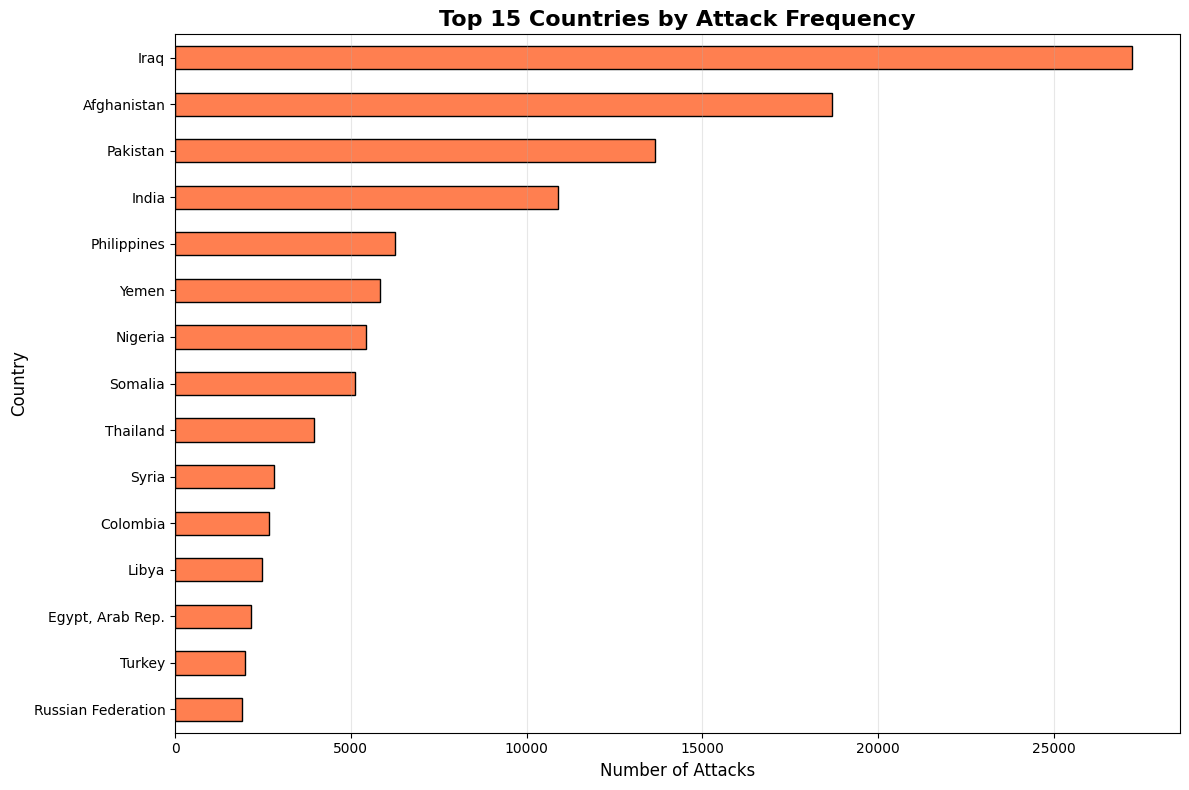

In [ ]:
# ================================================================
# EDA 2: GEOGRAPHIC DISTRIBUTION
# ================================================================
print("-"*60)
print("GEOGRAPHIC DISTRIBUTION")
print("-" * 70)

# Regional breakdown
regional = wb_gtd['region_txt'].value_counts()
print("\nAttacks by Region:")
for region, count in regional.items():
    print(f"  {region}: {count:,} ({count/len(wb_gtd)*100:.1f}%)")

# Top 15 countries
top_countries = wb_gtd['country_txt'].value_counts().head(15)
print(f"\nTop 15 Countries:")
for i, (country, count) in enumerate(top_countries.items(), 1):
    print(f"  {i}. {country}: {count:,}")

# Visualize top countries
plt.figure(figsize=(12, 8))
top_countries.plot(kind='barh', color='coral', edgecolor='black')
plt.title('Top 15 Countries by Attack Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Number of Attacks', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('fig3_top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

------------------------------------------------------------
ATTACK CHARACTERISTICS
----------------------------------------------------------------------

Attack Types:
  Bombing/Explosion: 68,457 (49.3%)
  Armed Assault: 33,105 (23.8%)
  Hostage Taking (Kidnapping): 10,680 (7.7%)
  Assassination: 9,133 (6.6%)
  Unknown: 8,181 (5.9%)

Most Targeted Sectors:
  Civilian: 38,815 (27.9%)
  Military: 24,448 (17.6%)
  Security Forces: 20,653 (14.9%)
  Other: 17,343 (12.5%)
  Government: 16,187 (11.7%)

Most Common Weapons:
  Explosives: 73,575 (53.0%)
  Firearms: 41,448 (29.8%)
  Unknown: 13,236 (9.5%)
  Incendiary: 7,191 (5.2%)
  Melee: 2,779 (2.0%)


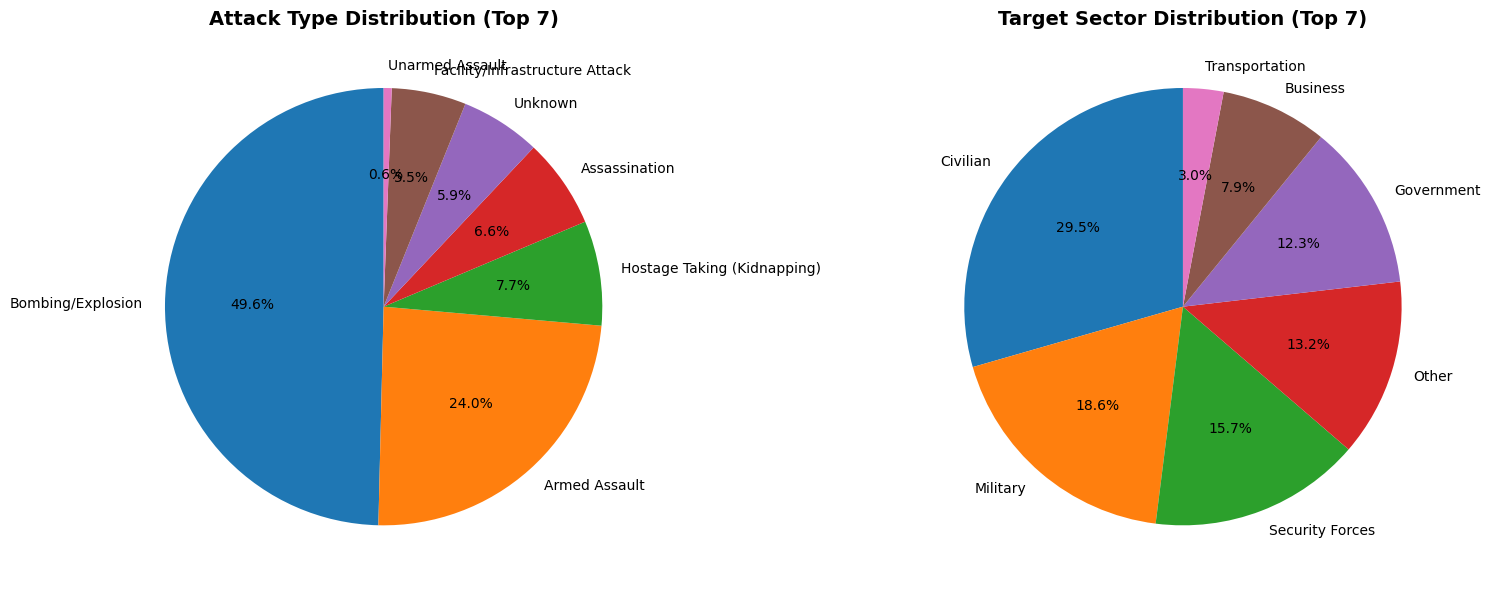

In [ ]:
# ================================================================
# 4. ATTACK CHARACTERISTICS
# ================================================================
print("-" * 60)
print("ATTACK CHARACTERISTICS")
print("-" * 70)

# Attack types
attack_types = wb_gtd['attacktype1_txt'].value_counts()
print("\nAttack Types:")
for attack, count in attack_types.head(5).items():
    print(f"  {attack}: {count:,} ({count/len(wb_gtd)*100:.1f}%)")

# Target sectors
targets = wb_gtd['target_sector'].value_counts()
print("\nMost Targeted Sectors:")
for sector, count in targets.head(5).items():
    print(f"  {sector}: {count:,} ({count/len(wb_gtd)*100:.1f}%)")

# Weapons
weapons = wb_gtd['weaptype1_txt'].value_counts()
print("\nMost Common Weapons:")
for weapon, count in weapons.head(5).items():
    print(f"  {weapon}: {count:,} ({count/len(wb_gtd)*100:.1f}%)")

# Visualize attack types
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Attack types pie
attack_types.head(7).plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Attack Type Distribution (Top 7)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Target sectors pie
targets.head(7).plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Target Sector Distribution (Top 7)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('fig4_attack_target_breakdown.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# ================================================================
# 5. CASUALTIES ANALYSIS
# ================================================================
print("-" * 60)
print("CASUALTIES ANALYSIS")
print("-" * 70)

total_killed = wb_gtd['nkill_clean'].sum()
total_wounded = wb_gtd['nwound_clean'].sum()
total_casualties = total_killed + total_wounded

print(f"\nTotal fatalities: {total_killed:,}")
print(f"Total injuries: {total_wounded:,}")
print(f"Total casualties: {total_casualties:,}")

print(f"\nAverage per incident:")
print(f"  Fatalities: {wb_gtd['nkill_clean'].mean():.2f}")
print(f"  Injuries: {wb_gtd['nwound_clean'].mean():.2f}")
print(f"  Total casualties: {wb_gtd['total_casualties'].mean():.2f}")

# Casualty severity distribution
severity = wb_gtd['casualties_category'].value_counts()
print(f"\nCasualty Severity Distribution:")
for cat, count in severity.items():
    print(f"  {cat}: {count:,} ({count/len(wb_gtd)*100:.1f}%)")

# Identify deadliest incidents
deadliest = wb_gtd.nlargest(10, 'total_casualties')[['iyear', 'country_txt', 'city',
                                                     'attacktype1_txt', 'total_casualties']]
print(f"\nTop 10 Deadliest Incidents:")
print(deadliest.to_string(index=False))

------------------------------------------------------------
CASUALTIES ANALYSIS
----------------------------------------------------------------------

Total fatalities: 337,014.0
Total injuries: 448,273.0
Total casualties: 785,287.0

Average per incident:
  Fatalities: 2.43
  Injuries: 3.23
  Total casualties: 5.65

Casualty Severity Distribution:
  1_to_50: 89,700 (64.6%)
  0: 47,169 (34.0%)
  51_to_100: 1,369 (1.0%)
  over_100: 662 (0.5%)

Top 10 Deadliest Incidents:
 iyear        country_txt          city                     attacktype1_txt  total_casualties
  2001      United States New York City                           Hijacking           12263.0
  2001      United States New York City                           Hijacking           12263.0
  2014               Iraq        Tikrit         Hostage Taking (Kidnapping)            1700.0
  2016               Iraq Taza Khurmatu                   Bombing/Explosion            1503.0
  2008               Chad     N'Djamena               

------------------------------------------------------------
ECONOMIC ANALYSIS
----------------------------------------------------------------------

Incidents with economic data: 138,900 (100.0%)
Incidents without economic data: 0 (0.0%)

Top 10 by Per-Capita Attack Rate (min 20 attacks):
               total_attacks  attacks_per_million  gdp_per_capita
country_txt                                                      
New Caledonia             24             3.525477    34462.479682
Maldives                  26             2.412442     8808.169220
Cyprus                    23             0.840761    26186.116763
Bahrain                  164             0.771866    25848.357019
Kosovo                   160             0.553673     1145.906748
Namibia                   24             0.547017     2096.404245
Georgia                  114             0.259754     2793.511489
New Zealand               24             0.213930    36559.351276
Ireland                  194             0.21322

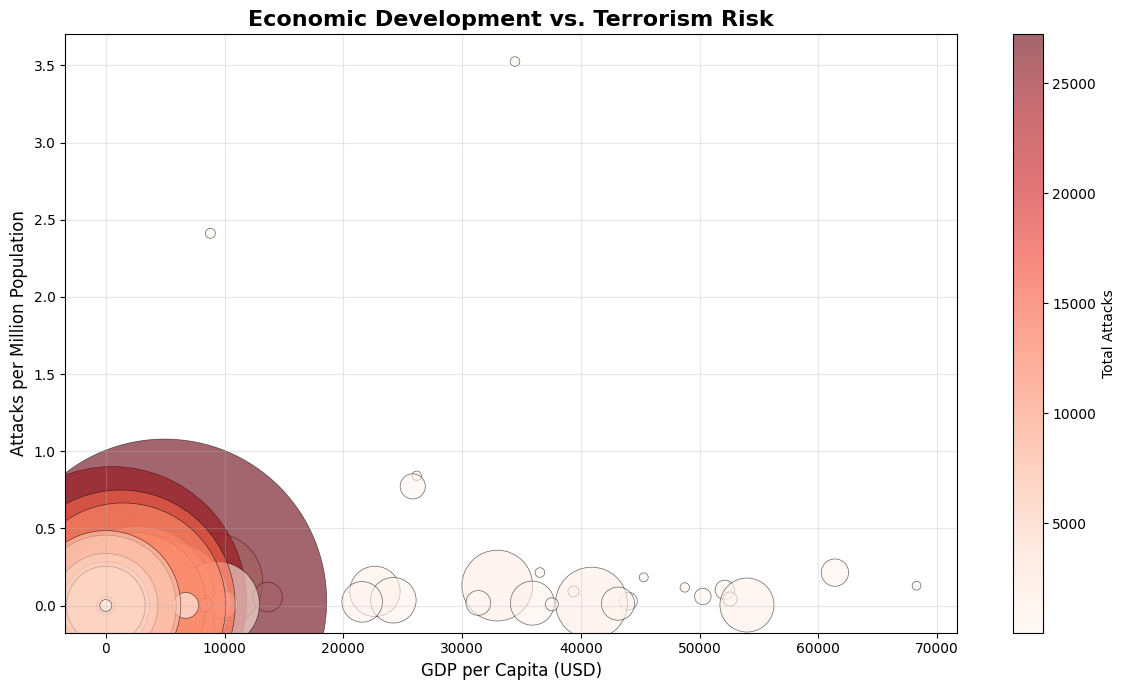

In [ ]:
# ================================================================
# 6. ECONOMIC CONTEXT
# ================================================================
print("-" * 60)
print("ECONOMIC ANALYSIS")
print("-" * 70)

# Filter data with economic info
with_econ = wb_gtd[wb_gtd['population'].notna()].copy()
coverage = len(with_econ) / len(wb_gtd) * 100

print(f"\nIncidents with economic data: {len(with_econ):,} ({coverage:.1f}%)")
print(f"Incidents without economic data: {len(wb_gtd) - len(with_econ):,} ({100-coverage:.1f}%)")

if len(with_econ) > 100:
    # Per-capita analysis
    country_stats = with_econ.groupby('country_txt').agg({
        'eventid': 'count',
        'attacks_per_million': 'mean',
        'casualties_per_million': 'mean',
        'gdp_per_capita': 'mean'
    }).rename(columns={'eventid': 'total_attacks'})

    # Filter countries with at least 20 attacks
    country_stats = country_stats[country_stats['total_attacks'] >= 20]
    country_stats = country_stats.sort_values('attacks_per_million', ascending=False)

    print(f"\nTop 10 by Per-Capita Attack Rate (min 20 attacks):")
    print(country_stats.head(10)[['total_attacks', 'attacks_per_million', 'gdp_per_capita']].to_string())

    # GDP vs Attacks scatter
    plt.figure(figsize=(12, 7))
    plt.scatter(country_stats['gdp_per_capita'],
                country_stats['attacks_per_million'],
                s=country_stats['total_attacks']*2,
                alpha=0.6,
                c=country_stats['total_attacks'],
                cmap='Reds',
                edgecolors='black',
                linewidth=0.5)
    plt.xlabel('GDP per Capita (USD)', fontsize=12)
    plt.ylabel('Attacks per Million Population', fontsize=12)
    plt.title('Economic Development vs. Terrorism Risk', fontsize=16, fontweight='bold')
    plt.colorbar(label='Total Attacks')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('fig5_gdp_vs_attacks.png', dpi=300, bbox_inches='tight')
    plt.show()

------------------------------------------------------------
AVIATION TERRORISM ANALYSIS
----------------------------------------------------------------------

Aviation-related incidents: 437 (0.31% of total)
Date range: 2000 - 2020
Countries affected: 61

Top 10 Countries for Aviation Attacks:
  Afghanistan: 60
  Somalia: 47
  Libya: 46
  Iraq: 40
  Saudi Arabia: 33
  Pakistan: 30
  Yemen: 16
  Colombia: 12
  Philippines: 11
  Nepal: 11


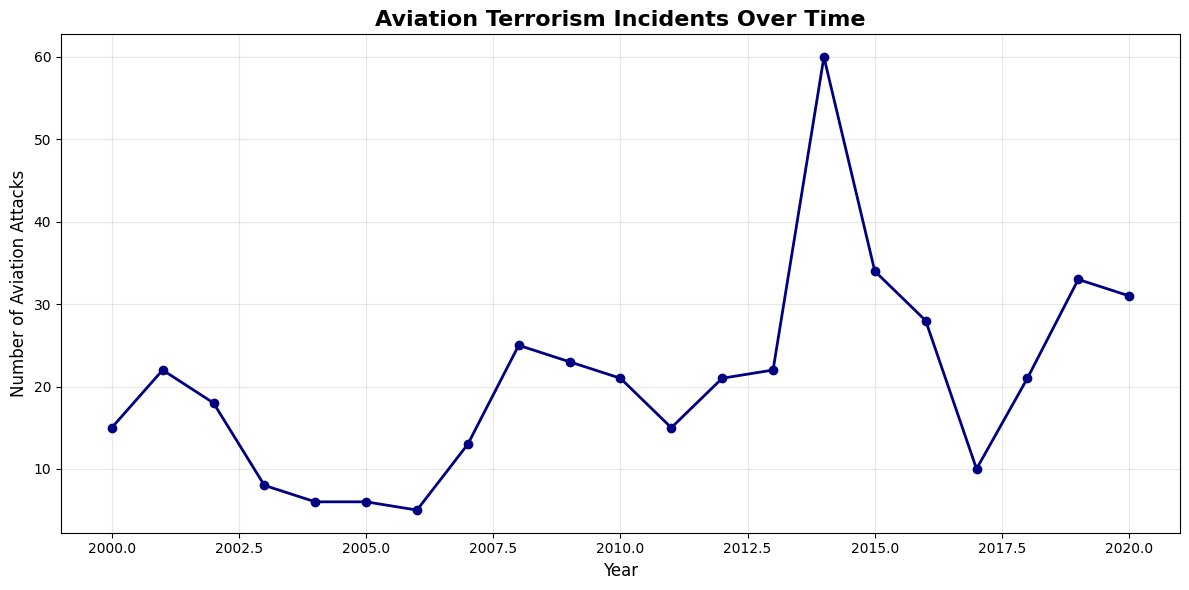

In [ ]:
# ================================================================
# 7. AVIATION SUBSET (for your 2 aviation visualizations)
# ================================================================
print("-" * 60)
print("AVIATION TERRORISM ANALYSIS")
print("-" * 70)

aviation = wb_gtd[wb_gtd['targtype1_txt'] == 'Airports & Aircraft'].copy()
print(f"\nAviation-related incidents: {len(aviation):,} ({len(aviation)/len(wb_gtd)*100:.2f}% of total)")

if len(aviation) > 0:
    print(f"Date range: {aviation['iyear'].min()} - {aviation['iyear'].max()}")
    print(f"Countries affected: {aviation['country_txt'].nunique()}")

    # Top countries
    aviation_countries = aviation['country_txt'].value_counts().head(10)
    print(f"\nTop 10 Countries for Aviation Attacks:")
    for country, count in aviation_countries.items():
        print(f"  {country}: {count}")

    # Temporal trend
    aviation_yearly = aviation.groupby('iyear').size()

    plt.figure(figsize=(12, 6))
    aviation_yearly.plot(kind='line', marker='o', color='navy', linewidth=2, markersize=6)
    plt.title('Aviation Terrorism Incidents Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Aviation Attacks', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('fig6_aviation_trend.png', dpi=300, bbox_inches='tight')
    plt.show()


------------------------------------------------------------
DAY-OF-WEEK ANALYSIS
------------------------------------------------------------

Attacks by Day of Week:
  Monday: 21,215 (15.3%)
  Tuesday: 20,539 (14.8%)
  Wednesday: 20,456 (14.7%)
  Thursday: 19,510 (14.0%)
  Friday: 17,738 (12.8%)
  Saturday: 19,169 (13.8%)
  Sunday: 20,273 (14.6%)


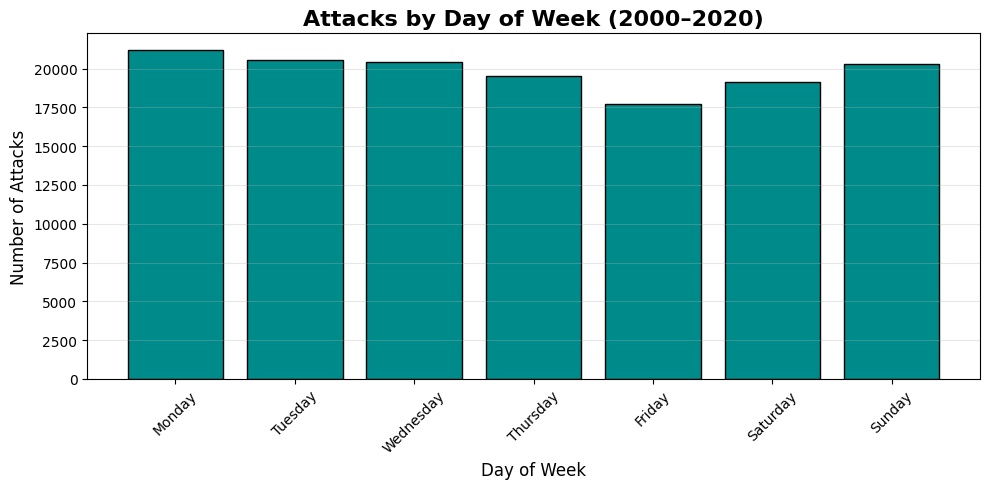

In [ ]:
# ================================================================
# 8. DAY-OF-WEEK PATTERNS
# ================================================================
print("-" * 60)
print("DAY-OF-WEEK ANALYSIS")
print("-" * 60)

# ensure a proper datetime column
wb_gtd["date"] = pd.to_datetime(wb_gtd["date"])

wb_gtd["weekday"] = wb_gtd["date"].dt.day_name()
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

weekday_counts = wb_gtd["weekday"].value_counts().reindex(weekday_order)

print("\nAttacks by Day of Week:")
for d, c in weekday_counts.items():
    print(f"  {d}: {c:,} ({c/len(wb_gtd)*100:.1f}%)")

plt.figure(figsize=(10,5))
plt.bar(weekday_counts.index, weekday_counts.values, color='darkcyan', edgecolor='black')
plt.title('Attacks by Day of Week (2000–2020)', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('fig7_weekday_pattern.png', dpi=300, bbox_inches='tight')
plt.show()


------------------------------------------------------------
WEEK-OF-YEAR SEASONALITY
------------------------------------------------------------

Attacks by ISO Week (aggregated over all years):
weekofyear
1     2622
2     2507
3     2614
4     2685
5     2748
6     2567
7     2670
8     2698
9     2506
10    2604
11    2460
12    2593
13    2506
14    2803
15    2960
16    2679
17    2606
18    2907
19    3021
20    3010
21    2911
22    2954
23    2962
24    2818
25    2636
26    2666
27    2981
28    2869
29    2755
30    2794
31    2950
32    2667
33    2759
34    2718
35    2509
36    2413
37    2557
38    2535
39    2443
40    2403
41    2596
42    2656
43    2601
44    2738
45    2601
46    2785
47    2615
48    2641
49    2369
50    2207
51    2274
52    2342
53     409
dtype: int64


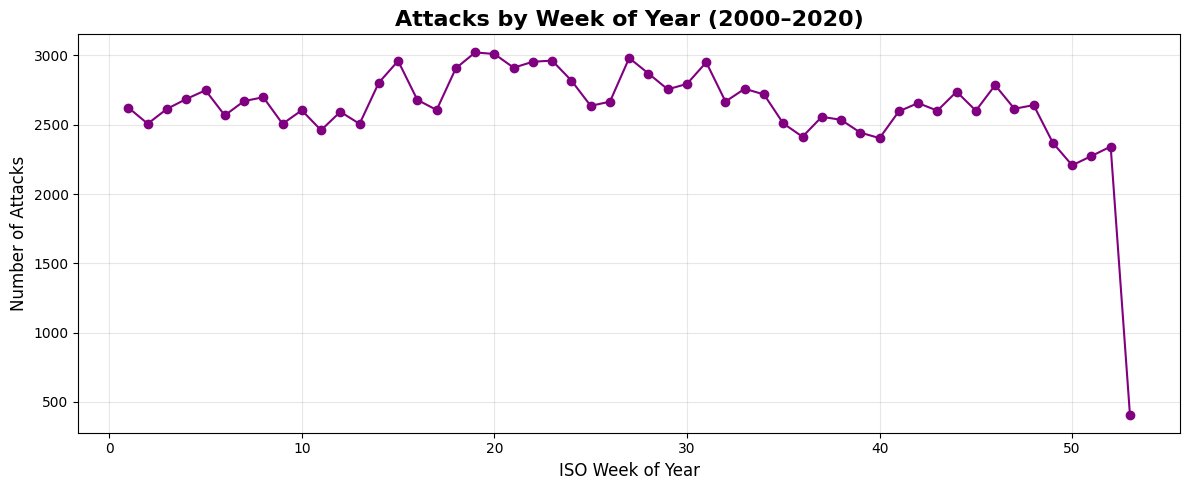

In [ ]:
# ================================================================
# 9. WEEK-OF-YEAR SEASONALITY
# ================================================================
print("-" * 60)
print("WEEK-OF-YEAR SEASONALITY")
print("-" * 60)

wb_gtd["weekofyear"] = wb_gtd["date"].dt.isocalendar().week.astype(int)
week_counts = wb_gtd.groupby("weekofyear").size()

print("\nAttacks by ISO Week (aggregated over all years):")
print(week_counts)

plt.figure(figsize=(12,5))
plt.plot(week_counts.index, week_counts.values, color='purple', marker='o')
plt.title('Attacks by Week of Year (2000–2020)', fontsize=16, fontweight='bold')
plt.xlabel('ISO Week of Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fig8_weekofyear_trend.png', dpi=300, bbox_inches='tight')
plt.show()


------------------------------------------------------------
SEASONALITY BY REGION
------------------------------------------------------------

Sample of region–month attack matrix:
month_name                   Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
region_txt                                                                      
Australasia & Oceania         12    7   12    8    1   15   13    7   18   11   
Central America & Caribbean    8   12    6   10   11   17    6    7   11   19   
Central Asia                  11   29   13   18   14   33   26   21   27   16   
East Asia                     14   26   20   19   27   23   29   21   19   15   
Eastern Europe               339  473  242  291  360  496  341  275  344  359   

month_name                   Oct  Sep  
region_txt                             
Australasia & Oceania          6    8  
Central America & Caribbean   13   10  
Central Asia                  16   19  
East Asia                     14   16  
Eastern E

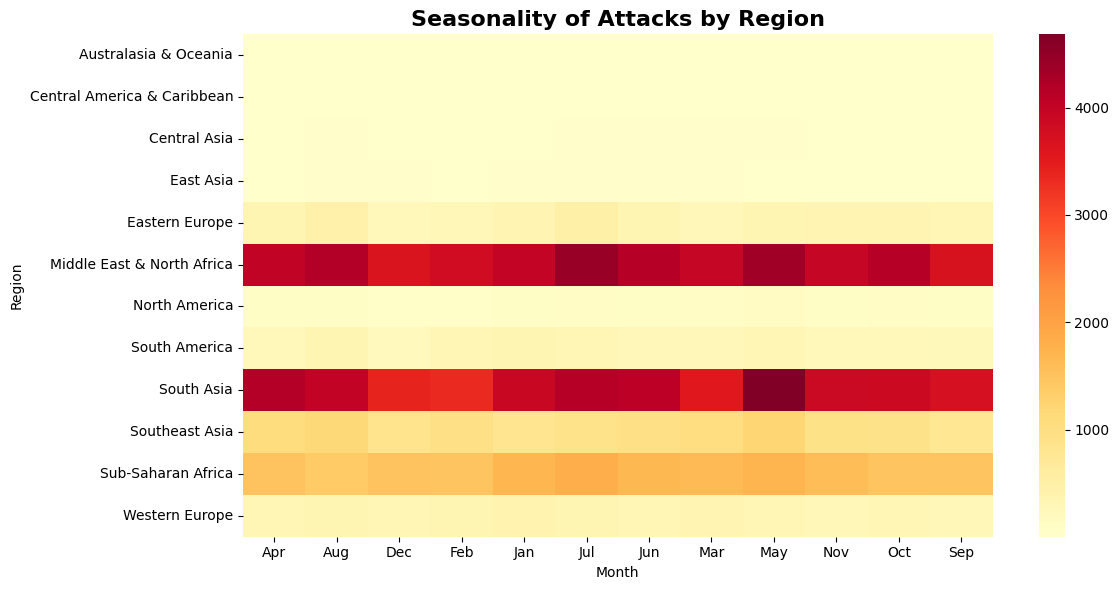

In [ ]:
# ================================================================
# 10. SEASONALITY BY REGION
# ================================================================
print("-" * 60)
print("SEASONALITY BY REGION")
print("-" * 60)

month_region = (
    wb_gtd.groupby(["region_txt", "imonth"])["eventid"]
          .count()
          .reset_index()
          .rename(columns={"eventid":"attacks"})
)

month_labels = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",
                7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
month_region["month_name"] = month_region["imonth"].map(month_labels)

pivot = month_region.pivot(index="region_txt", columns="month_name", values="attacks").fillna(0)

print("\nSample of region–month attack matrix:")
print(pivot.head())

plt.figure(figsize=(12,6))
import seaborn as sns
sns.heatmap(pivot, cmap="YlOrRd")
plt.title('Seasonality of Attacks by Region', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Region')
plt.tight_layout()
plt.savefig('fig9_region_month_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


------------------------------------------------------------
PER-CAPITA TEMPORAL TRENDS
------------------------------------------------------------

Per-capita terrorism burden by year:
   year  attacks_per_million  casualties_per_million  fatalities_per_million
0  2000           118.221647              564.547134              198.253957
1  2001            75.313335              547.264142              186.148970
2  2002            46.716777              501.267026              163.787967
3  2003            47.395009              318.055577              104.282098
4  2004            34.514355              494.515076              164.728981


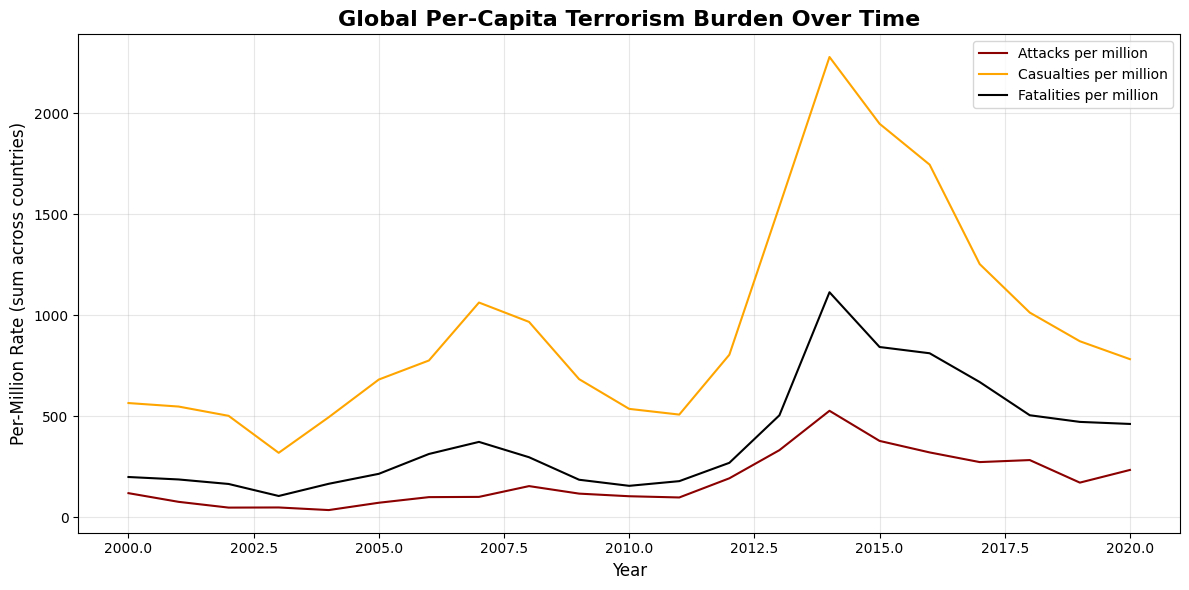

In [ ]:
# ================================================================
# 11. GLOBAL PER-CAPITA BURDEN OVER TIME
# ================================================================
print("-" * 60)
print("PER-CAPITA TEMPORAL TRENDS")
print("-" * 60)

percap_year = (
    wb_gtd.groupby("year")[["attacks_per_million",
                            "casualties_per_million",
                            "fatalities_per_million"]]
          .sum()
          .reset_index()
)

print("\nPer-capita terrorism burden by year:")
print(percap_year.head())

plt.figure(figsize=(12,6))
plt.plot(percap_year["year"], percap_year["attacks_per_million"],
         label="Attacks per million", color="darkred")
plt.plot(percap_year["year"], percap_year["casualties_per_million"],
         label="Casualties per million", color="orange")
plt.plot(percap_year["year"], percap_year["fatalities_per_million"],
         label="Fatalities per million", color="black")
plt.title('Global Per-Capita Terrorism Burden Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Per-Million Rate (sum across countries)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fig10_percapita_trend.png', dpi=300, bbox_inches='tight')
plt.show()


------------------------------------------------------------
ATTACK TYPE MIX OVER TIME
------------------------------------------------------------

Sample of attack-type shares by year:
   year                 attacktype1_txt  attacks     share
0  2000                   Armed Assault      489  0.274565
1  2000                   Assassination      100  0.056148
2  2000               Bombing/Explosion      891  0.500281
3  2000  Facility/Infrastructure Attack      110  0.061763
4  2000                       Hijacking        7  0.003930


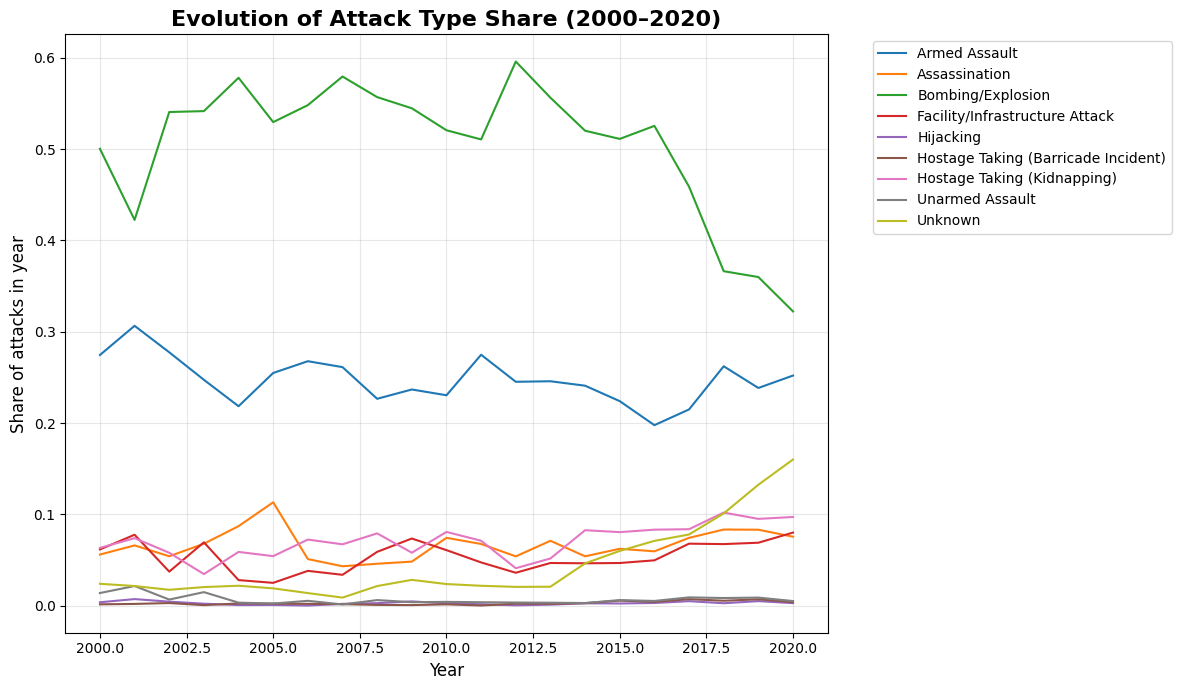

In [ ]:
# ================================================================
# 12. ATTACK TYPE MIX OVER TIME
# ================================================================
print("-" * 60)
print("ATTACK TYPE MIX OVER TIME")
print("-" * 60)

att_year = (
    wb_gtd.groupby(["iyear", "attacktype1_txt"])["eventid"]
          .count()
          .reset_index()
          .rename(columns={"iyear":"year","eventid":"attacks"})
)

year_totals = att_year.groupby("year")["attacks"].transform("sum")
att_year["share"] = att_year["attacks"] / year_totals

print("\nSample of attack-type shares by year:")
print(att_year.head())

plt.figure(figsize=(12,7))
sns.lineplot(data=att_year, x="year", y="share", hue="attacktype1_txt")
plt.title('Evolution of Attack Type Share (2000–2020)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Share of attacks in year', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fig11_attacktype_mix.png', dpi=300, bbox_inches='tight')
plt.show()
